In [21]:
!pip install numpy tensorflow scikit-learn matplotlib seaborn opencv-python pillow


In [22]:
# === Core Libraries ===
import numpy as np
import tensorflow as tf
from tensorflow import keras

# === Keras Model Components ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# === Evaluation Metrics ===
from sklearn.metrics import confusion_matrix, classification_report

# === Utilities ===
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# === Configuration ===
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [19]:
import os
import shutil
import random
from glob import glob
os.chdir('/Users/dianhaoli/Documents/data/')

SRC_DIR = 'train'

valid_ratio = 0.1
test_ratio = 0.1

for split in ['valid', 'test']:
    for label in os.listdir(SRC_DIR):
        os.makedirs(os.path.join(split, label), exist_ok=True)

# --- split each class ---
for label in os.listdir(SRC_DIR):
    files = glob(os.path.join(SRC_DIR, label, '*.jpg'))
    random.shuffle(files)

    valid_end = int(len(files) * valid_ratio)
    test_end  = valid_end + int(len(files) * test_ratio)

    # Copy 10% of files to valid/
    for f in files[:valid_end]:
        shutil.move(f, os.path.join('valid', label))

    # Copy next 10% to test/
    for f in files[valid_end:test_end]:
        shutil.move(f, os.path.join('test', label))

print("Created 'valid' and 'test' folders inside /Users/dianhaoli/Documents/data/")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dianhaoli/Documents/data/'

In [24]:

# Define augmentation for the training set
train_newdata = ImageDataGenerator(
    rescale=1./255,           # normalize pixel values
    rotation_range=30,        # rotated images
    width_shift_range=0.1,    # shifted horizontally
    height_shift_range=0.1,   # shifted vertically
    shear_range=0.1,          # shearing
    zoom_range=0.25,           # zoom in/out
    horizontal_flip=True,     # flip hands (use cautiously for letters that are asymmetric)
    fill_mode='nearest'       # fill missing pixels after transforms
)

# standardizing scaling for validation and testing data 
valid_newdata = ImageDataGenerator(rescale=1./255)
test_newdata  = ImageDataGenerator(rescale=1./255)


train_generator = train_newdata.flow_from_directory(
    'train',
    target_size=(64, 64),    
    batch_size=32,
    class_mode='categorical'  
)

valid_generator = valid_newdata.flow_from_directory(
    'valid',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_newdata.flow_from_directory(
    'test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


KeyboardInterrupt: 

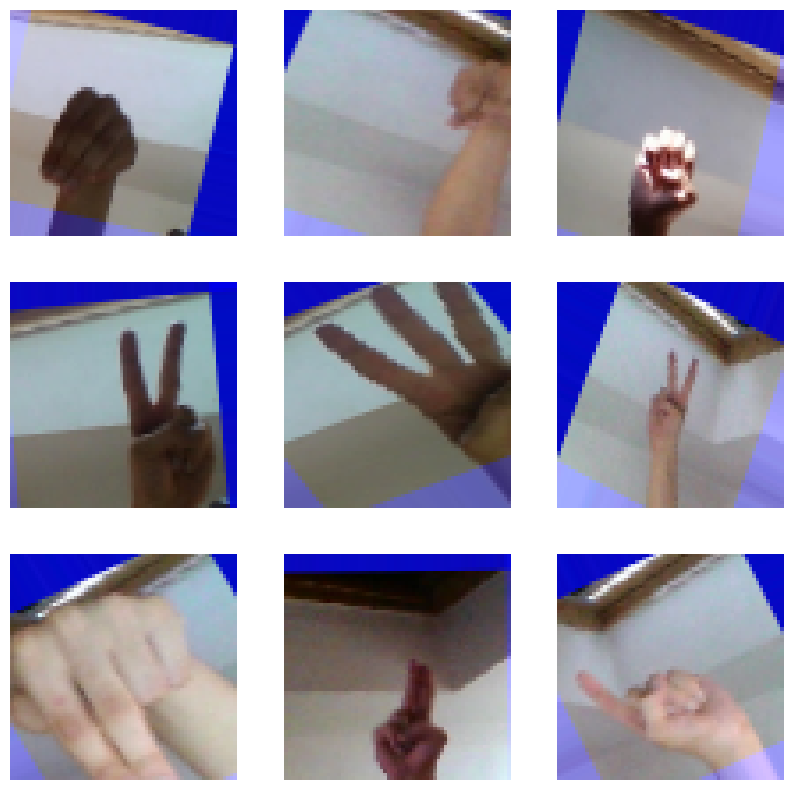

In [14]:
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()
